# Preprocessing and Modeling (Brain Tumor Classification)

## Step 1: Importing Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
from PIL import ImageFont
import os, sys, os.path, time
import itertools
from PIL import Image, ImageOps
import cv2, PIL
# from tqdm import tqdm
sns.set()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Sequential

from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, Dropout, Activation

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

## Step 2: Data Preparation

### I. Creating image arrays and corresponding labels for training, validation, and test dataset

In [44]:
# Resized train, test, and validation direcories
# Set labels for data preparation
training_path = "../BrainTumorDataClean/Training/"
validation_path = "../BrainTumorDataClean/Validation/"
test_path = "../BrainTumorDataClean/Testing/"

labels = ['Glioma','Meningioma','NoTumor','Pituitary']

In [45]:
# Set Image Shape for Modeling
# Set epochs
image_size = 128
image_shape = (128,128,1)
font = ImageFont.truetype("arial.ttf", 15)
epochs = 15

In [46]:
# Creating image arrays and corresponding labels for training dataset
X_train = []
y_train = []
for label in labels:
    folderPath = os.path.join(training_path, label)
    for img_name in os.listdir(folderPath):
        img = plt.imread(os.path.join(folderPath,img_name))
        X_train.append(img)
        y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [47]:
# Creating image arrays and corresponding labels for validation dataset
X_valid = []
y_valid = []
for label in labels:
    folderPath = os.path.join(validation_path, label)
    for img_name in os.listdir(folderPath):
        img = plt.imread(os.path.join(folderPath,img_name))
        X_valid.append(img)
        y_valid.append(label)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [48]:
# Creating image arrays and corresponding labels for test dataset
X_test = []
y_test = []
for label in labels:
    folderPath = os.path.join(test_path, label)
    for img_name in os.listdir(folderPath):
        img = plt.imread(os.path.join(folderPath,img_name))
        X_test.append(img)
        y_test.append(label)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [49]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)

In [50]:
X_valid, y_valid = shuffle(X_valid, y_valid, random_state=101)

In [51]:
X_test, y_test = shuffle(X_test, y_test, random_state=101)

In [52]:
X_train.shape, X_valid.shape, X_test.shape

((4923, 128, 128), (1052, 128, 128), (1048, 128, 128))

In [53]:
y_train.shape, y_valid.shape, y_test.shape

((4923,), (1052,), (1048,))

In [54]:
labels.index('NoTumor')
y_test[:20]

array(['Glioma', 'Meningioma', 'Glioma', 'Meningioma', 'NoTumor',
       'NoTumor', 'Glioma', 'Meningioma', 'Glioma', 'NoTumor',
       'Pituitary', 'NoTumor', 'Meningioma', 'Pituitary', 'Glioma',
       'Glioma', 'NoTumor', 'Meningioma', 'Pituitary', 'Meningioma'],
      dtype='<U10')

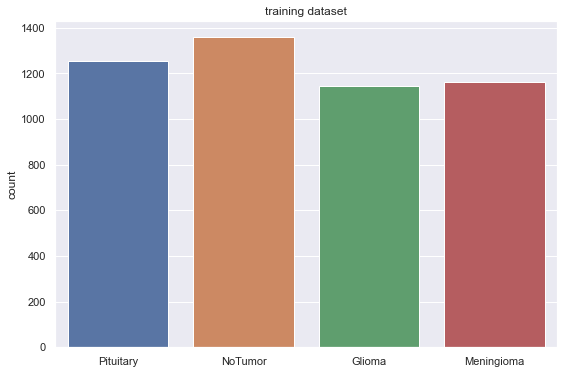

In [55]:
# Countplot for training dataset
plt.figure(figsize=(9,6))
sns.countplot(x = y_train)
plt.title('training dataset')
plt.savefig("../Figures/Countplot-Training", dpi=95)
plt.show()

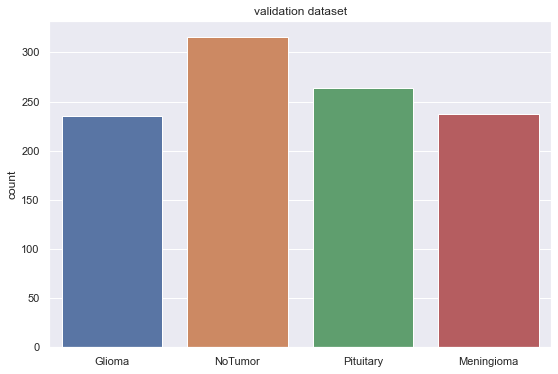

In [56]:
# Countplot for validation dataset
plt.figure(figsize=(9,6))
sns.countplot(x = y_valid)
plt.title('validation dataset')
plt.savefig("../Figures/Countplot-Validation", dpi=95)
plt.show()

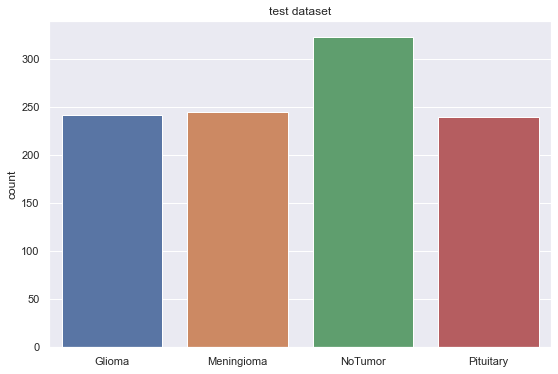

In [57]:
# Countplot for test dataset
plt.figure(figsize=(9,6))
sns.countplot(x = y_test)
plt.title('test dataset')
plt.savefig("../Figures/Countplot-Testing", dpi=95)
plt.show()

### II. Creating one-hot vectors for y_train, y_test, and y_valid

In [58]:
# Creating one-hot vector for y_train
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [59]:
# Creating one-hot vector for y_valid
y_valid_new = []
for i in y_valid:
    y_valid_new.append(labels.index(i))
y_valid = y_valid_new
y_valid = tf.keras.utils.to_categorical(y_valid)

In [60]:
# Creating one-hot vector for y_test
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [61]:
y_train.shape, y_valid.shape, y_test.shape

((4923, 4), (1052, 4), (1048, 4))

In [62]:
# y_train[:10], y_valid[:10], y_test[:10]

## Step 3: Modeling

### Model 1: Simple neural network using  only dense layers

In [32]:
# Specifying the Model1 architecture 
# Using only Fully Connected Neural Network (six hidden layers) 
# Not using any regularization

# Defining model
model1 = Sequential()

# Fully Connected layers
model1.add(Flatten(input_shape=image_shape))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))

# Output layer with 4 neurons for 4 classes ['Glioma','Meningioma','NoTumor','Pituitary']
model1.add(Dense(4, activation='softmax'))

In [33]:
# Compile the model with optimizer='adam', metrics='categorical_accuracy'
early_stopping_monitor1 = EarlyStopping(patience=4)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [34]:
# Fit the model with training images with batch_size=32, with preset epochs
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size=32, \
                      validation_data = (X_valid, y_valid), callbacks=[early_stopping_monitor1])

Epoch 1/15
154/154 [==============================] - 6s 38ms/step - loss: 53.0604 - categorical_accuracy: 0.4969 - val_loss: 9.0013 - val_categorical_accuracy: 0.5428
Epoch 2/15
154/154 [==============================] - 6s 37ms/step - loss: 4.1786 - categorical_accuracy: 0.6614 - val_loss: 4.5197 - val_categorical_accuracy: 0.6559
Epoch 3/15
154/154 [==============================] - 6s 37ms/step - loss: 2.0688 - categorical_accuracy: 0.7201 - val_loss: 1.6824 - val_categorical_accuracy: 0.7576
Epoch 4/15
154/154 [==============================] - 6s 37ms/step - loss: 1.9088 - categorical_accuracy: 0.7372 - val_loss: 1.8709 - val_categorical_accuracy: 0.7700
Epoch 5/15
154/154 [==============================] - 6s 37ms/step - loss: 1.0287 - categorical_accuracy: 0.7954 - val_loss: 1.8312 - val_categorical_accuracy: 0.7044
Epoch 6/15
154/154 [==============================] - 6s 40ms/step - loss: 0.7345 - categorical_accuracy: 0.8200 - val_loss: 1.6339 - val_categorical_accuracy: 0.69

In [35]:
# Evaluate the model with test images
model1.evaluate(X_test, y_test)

33/33 [==============================] - 0s 6ms/step - loss: 0.4329 - categorical_accuracy: 0.8941


[0.4328753650188446, 0.8940839767456055]

In [36]:
# Predict the model for performance metric visualization
y_pred1 = model1.predict(X_test)

In [188]:
# Model Summary
model1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 16384)             0         
                                                                 
 dense_152 (Dense)           (None, 512)               8389120   
                                                                 
 dense_153 (Dense)           (None, 256)               131328    
                                                                 
 dense_154 (Dense)           (None, 128)               32896     
                                                                 
 dense_155 (Dense)           (None, 64)                8256      
                                                                 
 dense_156 (Dense)           (None, 32)                2080      
                                                                 
 dense_157 (Dense)           (None, 16)              

In [291]:
# Display the model and saving to drive
visualkeras.layered_view(model1, legend=True, font=font)
visualkeras.layered_view(model1, to_file='../Figures/Model_Architectures/Model1_Architecture.png') 

### Model 2: Convolutional neural network with two Conv2D layers

In [196]:
# Defining a convolutional neural network architecture
# Using 2 Convolutional layer with 'relu' activation function
# Not using any regularization

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(32, (3,3), activation='relu', padding = 'same', strides=1, input_shape = image_shape))
model2.add(MaxPooling2D((2,2), strides=2))

# Convolutional layer 2
model2.add(Conv2D(64, (3,3), activation='relu', strides=1, padding = 'same'))
model2.add(MaxPooling2D((2,2), strides=2))

# Fully connected layers
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))

# Output layer with 4 neurons for 4 classes 
model2.add(Dense(4, activation='softmax'))

In [197]:
# Compile the model with optimizer='adam'
early_stopping_monitor2 = EarlyStopping(patience=5)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [198]:
# Fit the model with training images with batch_size=32, epochs=15 initialized earlier
history2 = model2.fit(X_train, y_train, epochs = epochs, batch_size=32, \
                      validation_data = (X_valid, y_valid), callbacks=[early_stopping_monitor2])

Epoch 1/15
154/154 [==============================] - 70s 450ms/step - loss: 9.9894 - categorical_accuracy: 0.7542 - val_loss: 0.4672 - val_categorical_accuracy: 0.8707
Epoch 2/15
154/154 [==============================] - 69s 446ms/step - loss: 0.2389 - categorical_accuracy: 0.9202 - val_loss: 0.4076 - val_categorical_accuracy: 0.8878
Epoch 3/15
154/154 [==============================] - 68s 443ms/step - loss: 0.1044 - categorical_accuracy: 0.9665 - val_loss: 0.4765 - val_categorical_accuracy: 0.8973
Epoch 4/15
154/154 [==============================] - 68s 440ms/step - loss: 0.0560 - categorical_accuracy: 0.9819 - val_loss: 0.3973 - val_categorical_accuracy: 0.9163
Epoch 5/15
154/154 [==============================] - 69s 448ms/step - loss: 0.0478 - categorical_accuracy: 0.9854 - val_loss: 0.4650 - val_categorical_accuracy: 0.9059
Epoch 6/15
154/154 [==============================] - 71s 458ms/step - loss: 0.0412 - categorical_accuracy: 0.9878 - val_loss: 0.4237 - val_categorical_acc

In [199]:
# Evaluate the model with test images
model2.evaluate(X_test, y_test)

33/33 [==============================] - 2s 75ms/step - loss: 0.4911 - categorical_accuracy: 0.9389


[0.49110931158065796, 0.9389312863349915]

In [200]:
# Predict the model for performance metric calculations
y_pred2 = model2.predict(X_test)

In [201]:
# Model Summary
model2.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 65536)             0         
                                                                 
 dense_163 (Dense)           (None, 256)             

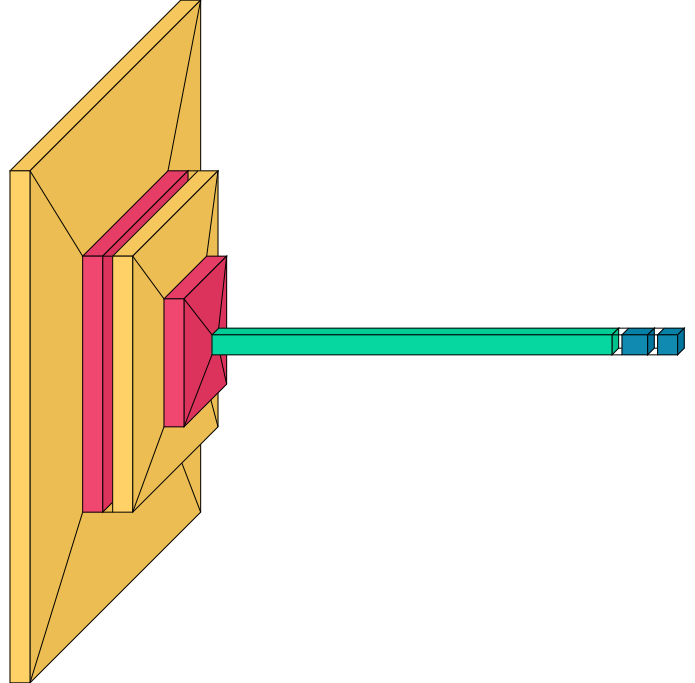

In [292]:
# display the model and saving to drive
visualkeras.layered_view(model2, legend=True) 
visualkeras.layered_view(model2, to_file='../Figures/Model_Architectures/Model2_Architecture.png') 

### Model 3: Convolutional neural network with two Conv2D layers with regularization layers

In [239]:
# Specifying the Model3 architecture 
# Using Convolutional Neural Network with 'relu' activation layer
# Adding BatchNormalization and Dropout layer to previous model to maximize generalization or minimize overfitting
# Adding two fully connected layers also
# Total Conv2D layer is 2

model3 = Sequential()

# Convolutional layer 1 with additional BatchNormalization and MaxPooling layers
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=image_shape))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Convolutional layer 2 with additional BatchNormalization and MaxPooling layers
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model3.add(Flatten())

# Fully connected layers

model3.add(Dense(units= 252, activation='relu'))
model3.add(Dropout(0.2))

# Output layer with 4 neurons for 4 classes 
model3.add(Dense(units=4, activation='softmax'))


In [240]:
# Compile the model with optimizer='adam'
early_stopping_monitor3 = EarlyStopping(patience=4)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [241]:
# Fit the model with training images with batch_size=32
history3 = model3.fit(X_train, y_train, epochs = epochs, batch_size=32, \
                     validation_data = (X_valid, y_valid), callbacks=[early_stopping_monitor3])

Epoch 1/15
154/154 [==============================] - 75s 485ms/step - loss: 3.0643 - categorical_accuracy: 0.7697 - val_loss: 0.9573 - val_categorical_accuracy: 0.7025
Epoch 2/15
154/154 [==============================] - 71s 462ms/step - loss: 0.3579 - categorical_accuracy: 0.8810 - val_loss: 0.3973 - val_categorical_accuracy: 0.8612
Epoch 3/15
154/154 [==============================] - 71s 464ms/step - loss: 0.2558 - categorical_accuracy: 0.9167 - val_loss: 0.3561 - val_categorical_accuracy: 0.8793
Epoch 4/15
154/154 [==============================] - 71s 463ms/step - loss: 0.1768 - categorical_accuracy: 0.9395 - val_loss: 0.4164 - val_categorical_accuracy: 0.9202
Epoch 5/15
154/154 [==============================] - 74s 481ms/step - loss: 0.1622 - categorical_accuracy: 0.9498 - val_loss: 0.7173 - val_categorical_accuracy: 0.9078
Epoch 6/15
154/154 [==============================] - 73s 473ms/step - loss: 0.1419 - categorical_accuracy: 0.9571 - val_loss: 0.4681 - val_categorical_acc

In [242]:
# Evaluate the model with test images
model3.evaluate(X_test, y_test)

33/33 [==============================] - 4s 109ms/step - loss: 0.5661 - categorical_accuracy: 0.8979


[0.5660623908042908, 0.8979007601737976]

In [243]:
# Predict the model for performance metric calculations
y_pred3 = model3.predict(X_test)

In [244]:
# Model Summary
model3.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 batch_normalization_36 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_37 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                     

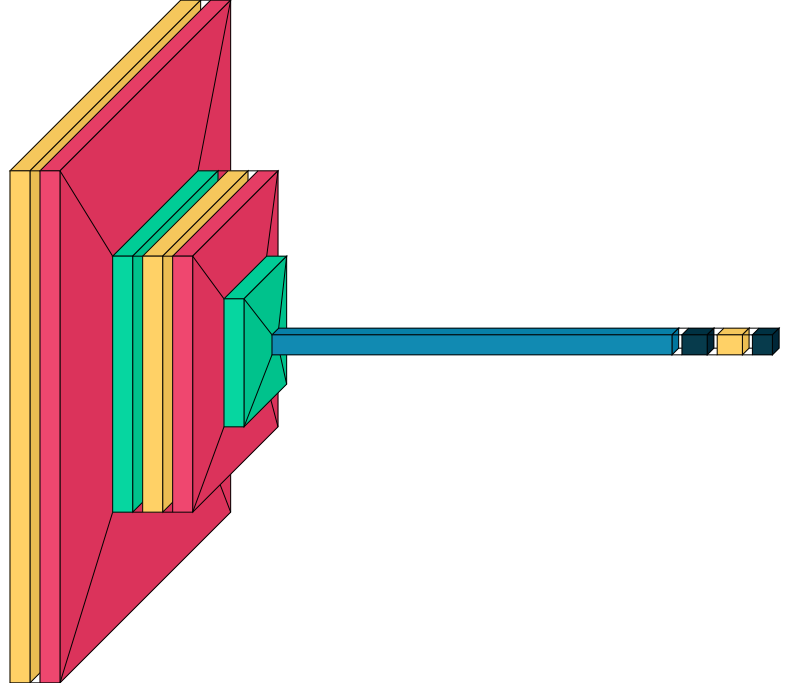

In [293]:
# display the model and saving to drive
visualkeras.layered_view(model3, legend=True) 
visualkeras.layered_view(model3, to_file='../Figures/Model_Architectures/Model3_Architecture.png') 

### Model 4: Convolutional neural network with three Conv2D layers and regularization layers

In [29]:
# Adding another convolutional layer to the previous model
# Changing few parameters, depth of hidden layers, filter size to see models performance
# Total Conv2D layer is 3
# Keeping BatchNormalization() and Dropout() layer to maximize generalization and minimize overfitting

model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(32,(5,5), input_shape=image_shape, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model4.add(Conv2D(64,(5,5), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model4.add(Conv2D(64,(5,5), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))


model4.add(Flatten())

# Fully connected layers

model4.add(Dense(units= 512, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(units=512, activation='relu'))
model4.add(Dropout(0.2))

# Output layer with 4 neuron for 4 classes
model4.add(Dense(units=4, activation='softmax'))

In [30]:
# Compile the model with adam optimizer with Learning rate scheduling (Learning rate decay)
# factor=0.5, patience=2, verbose=1, min_lr=0.00001, monitor='val_categorical_accuracy'
# earlystop = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr4 = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model4.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [31]:
# Fit the model with training images with batch_size=32
history4 = model4.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid),\
                      callbacks=[reduce_lr4])

Epoch 1/25
154/154 [==============================] - 118s 763ms/step - loss: 1.4056 - categorical_accuracy: 0.6988 - val_loss: 0.9654 - val_categorical_accuracy: 0.7291 - lr: 0.0010
Epoch 2/25
154/154 [==============================] - 122s 794ms/step - loss: 0.6215 - categorical_accuracy: 0.7965 - val_loss: 0.8868 - val_categorical_accuracy: 0.7262 - lr: 0.0010
Epoch 3/25
154/154 [==============================] - 115s 748ms/step - loss: 0.5061 - categorical_accuracy: 0.8269 - val_loss: 0.4698 - val_categorical_accuracy: 0.8422 - lr: 0.0010
Epoch 4/25
154/154 [==============================] - 118s 765ms/step - loss: 0.4007 - categorical_accuracy: 0.8558 - val_loss: 0.4088 - val_categorical_accuracy: 0.8660 - lr: 0.0010
Epoch 5/25
154/154 [==============================] - 116s 755ms/step - loss: 0.3095 - categorical_accuracy: 0.8850 - val_loss: 0.8403 - val_categorical_accuracy: 0.8004 - lr: 0.0010
Epoch 6/25
154/154 [==============================] - 121s 785ms/step - loss: 0.2456 

In [266]:
# Evaluate the model with test images
model4.evaluate(X_test, y_test)

33/33 [==============================] - 5s 152ms/step - loss: 0.1255 - categorical_accuracy: 0.9723


[0.12547844648361206, 0.972328245639801]

In [260]:
# Predict the model for performance metric calculations
y_pred4 = model4.predict(X_test)

In [261]:
# Model Summary
model4.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 128, 128, 32)      832       
                                                                 
 batch_normalization_44 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 batch_normalization_45 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                     

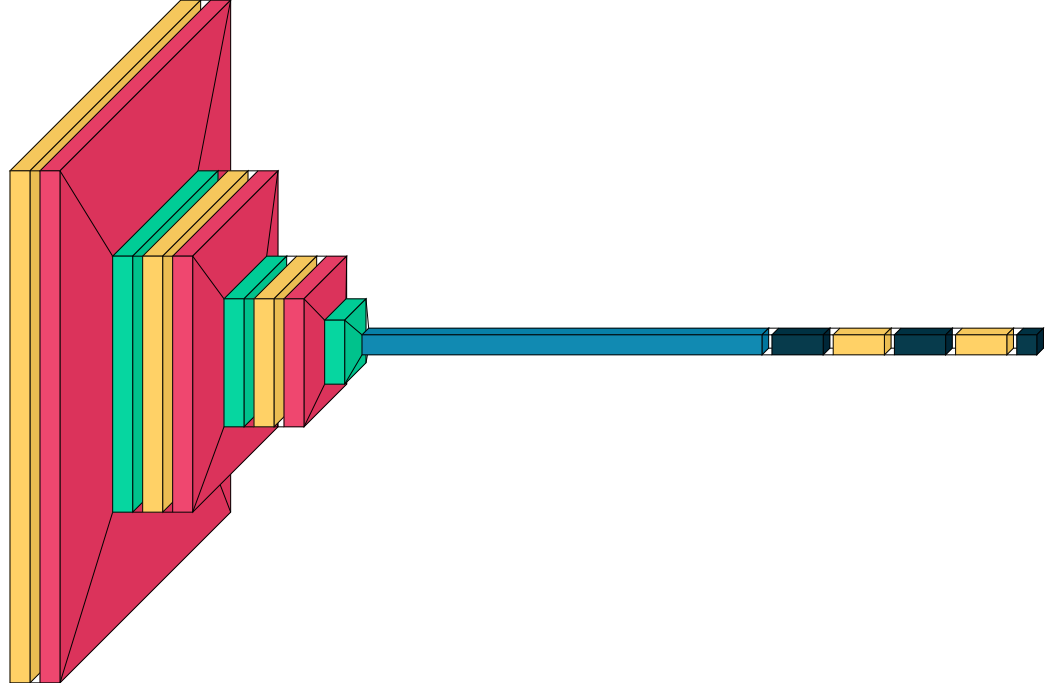

In [294]:
# display the model and saving to drive
visualkeras.layered_view(model4, legend=True) 
visualkeras.layered_view(model4, to_file='../Figures/Model_Architectures/Model4_Architecture.png') 

### Model 5: Convolutional neural network with four Conv2D layers and regularization layers

In [63]:
# Adding another convolutional layer to the previous model
# Also Changing filter size, depth of hidden layers, to see models performance
# Total Conv2D layer is 4

model5 = Sequential()

# Convolutional layer, Batch Normalization layer, and maxpool layer 1
model5.add(Conv2D(64,(3,3),activation='relu',input_shape=image_shape))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 2
model5.add(Conv2D(128,(3,3),activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 3
model5.add(Conv2D(128,(3,3),activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 4
model5.add(Conv2D(256,(3,3),activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(2,2))

# Fully connected layers
model5.add(Flatten()) 
model5.add(Dense(512,activation='relu'))
model5.add(Dropout(0.25))

# Output layer with 4 neurons for 4 classes 
model5.add(Dense(4,activation='softmax'))

In [64]:
# Compile the model
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=3, min_lr=0.00001)
model5.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [65]:
# Fit the model with training images with batch_size=32 and save the model depends on best validation accuracy
history5 = model5.fit(X_train, y_train, epochs = 25, batch_size=32, validation_data = (X_valid, y_valid), \
           callbacks = [model5_rlr, model5_mcp])

Epoch 1/25
154/154 [==============================] - ETA: 0s - loss: 1.1846 - categorical_accuracy: 0.7469
Epoch 00001: val_categorical_accuracy improved from -inf to 0.79087, saving model to model5_weights.h5
154/154 [==============================] - 148s 960ms/step - loss: 1.1846 - categorical_accuracy: 0.7469 - val_loss: 0.5395 - val_categorical_accuracy: 0.7909 - lr: 0.0010
Epoch 2/25
154/154 [==============================] - ETA: 0s - loss: 0.4581 - categorical_accuracy: 0.8430
Epoch 00002: val_categorical_accuracy improved from 0.79087 to 0.85741, saving model to model5_weights.h5
154/154 [==============================] - 152s 990ms/step - loss: 0.4581 - categorical_accuracy: 0.8430 - val_loss: 0.4679 - val_categorical_accuracy: 0.8574 - lr: 0.0010
Epoch 3/25
154/154 [==============================] - ETA: 0s - loss: 0.3540 - categorical_accuracy: 0.8814
Epoch 00003: val_categorical_accuracy did not improve from 0.85741
154/154 [==============================] - 154s 1s/step 

Epoch 24/25
154/154 [==============================] - ETA: 0s - loss: 0.0013 - categorical_accuracy: 0.9996
Epoch 00024: val_categorical_accuracy did not improve from 0.97148
154/154 [==============================] - 156s 1s/step - loss: 0.0013 - categorical_accuracy: 0.9996 - val_loss: 0.1694 - val_categorical_accuracy: 0.9715 - lr: 1.2500e-04
Epoch 25/25
154/154 [==============================] - ETA: 0s - loss: 0.0017 - categorical_accuracy: 0.9996
Epoch 00025: val_categorical_accuracy did not improve from 0.97148
154/154 [==============================] - 157s 1s/step - loss: 0.0017 - categorical_accuracy: 0.9996 - val_loss: 0.1757 - val_categorical_accuracy: 0.9677 - lr: 1.2500e-04


In [66]:
# Evaluate the model with test images
model5.evaluate(X_test, y_test)

33/33 [==============================] - 8s 234ms/step - loss: 0.0869 - categorical_accuracy: 0.9809


[0.0869068056344986, 0.9809160232543945]

In [67]:
# Predict the model for performance metric calculations
y_pred5 = model5.predict(X_test)

In [272]:
# Model Summary
model5.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 126, 126, 64)      640       
                                                                 
 batch_normalization_51 (Bat  (None, 126, 126, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 batch_normalization_52 (Bat  (None, 61, 61, 128)      512       
 chNormalization)                                                
                                                     

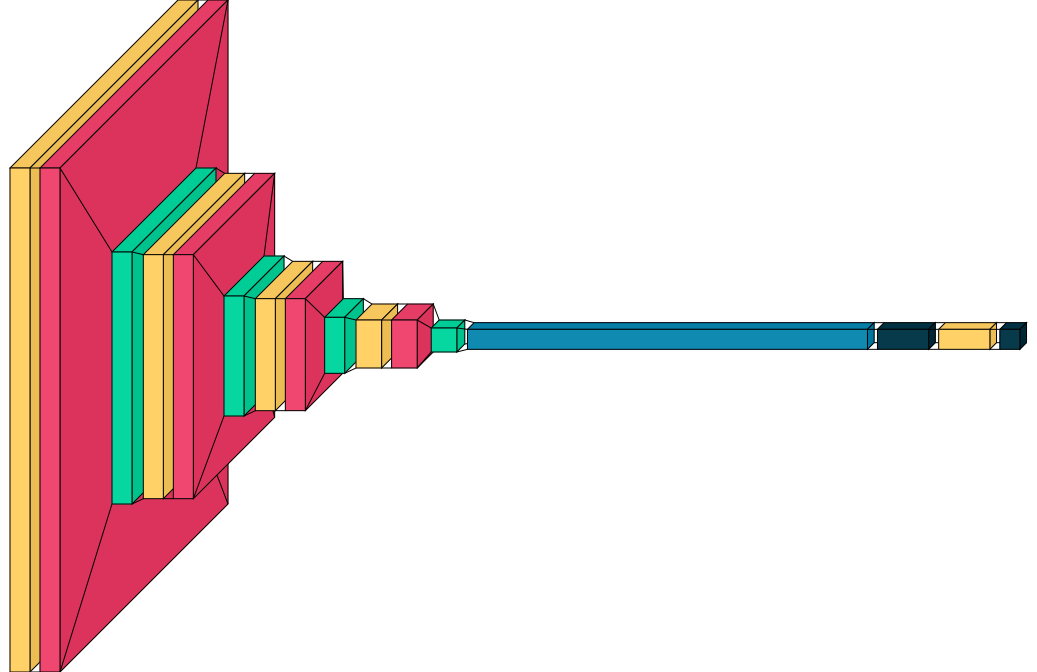

In [295]:
# display the model and saving to drive
visualkeras.layered_view(model5, legend=True) 
visualkeras.layered_view(model5, to_file='../Figures/Model_Architectures/Model5_Architecture.png') 

### Model 6: Implementing Hyperparameter Tuning of previous model (Model 5)

In [28]:
# Fine tuning of the best model
# Changing filter size to (5,5)
# Changing number of filters
# Changing parameter value in Dropout layer

model6 = Sequential()

# Convolutional layer, Batch Normalization layer, and maxpool layer 1
model6.add(Conv2D(64,(5,5),activation='relu',input_shape=image_shape))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 2
model6.add(Conv2D(128,(5,5),activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 3
model6.add(Conv2D(256,(5,5),activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 4
model6.add(Conv2D(512,(5,5),activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(2,2))

# Fully connected layers
model6.add(Flatten()) 
model6.add(Dense(512,activation='relu'))
model6.add(Dropout(0.25))

# Output layer with 4 neurons for 4 classes 
model6.add(Dense(4,activation='softmax'))

In [29]:
# Compile the model
earlystop6 = EarlyStopping(monitor='val_loss', patience=7)
reduce_lr6 = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=3, min_lr=0.00001)
model6.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [30]:
# Fit the model with training images with batch_size=32
history6 = model6.fit(X_train, y_train, epochs = 25, batch_size=32, validation_data = (X_valid, y_valid), \
           callbacks = [reduce_lr6, earlystop6])

Epoch 1/25
154/154 [==============================] - 327s 2s/step - loss: 1.4828 - categorical_accuracy: 0.6880 - val_loss: 0.9443 - val_categorical_accuracy: 0.6464 - lr: 0.0010
Epoch 2/25
154/154 [==============================] - 331s 2s/step - loss: 0.5406 - categorical_accuracy: 0.7924 - val_loss: 0.5650 - val_categorical_accuracy: 0.8042 - lr: 0.0010
Epoch 3/25
154/154 [==============================] - 333s 2s/step - loss: 0.4785 - categorical_accuracy: 0.8178 - val_loss: 1.0545 - val_categorical_accuracy: 0.6711 - lr: 0.0010
Epoch 4/25
154/154 [==============================] - 340s 2s/step - loss: 0.4196 - categorical_accuracy: 0.8460 - val_loss: 0.7692 - val_categorical_accuracy: 0.7053 - lr: 0.0010
Epoch 5/25
154/154 [==============================] - 25371s 166s/step - loss: 0.5481 - categorical_accuracy: 0.8255 - val_loss: 0.4449 - val_categorical_accuracy: 0.8536 - lr: 0.0010
Epoch 6/25
154/154 [==============================] - 293s 2s/step - loss: 0.3113 - categorical_

In [31]:
# Evaluate the model with test images
model6.evaluate(X_test, y_test)

33/33 [==============================] - 13s 382ms/step - loss: 0.1733 - categorical_accuracy: 0.9618


[0.17331184446811676, 0.9618320465087891]

In [286]:
# Predict the model for performance metric visualization
y_pred6 = model6.predict(X_test)

In [287]:
# Model Summary
model6.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 batch_normalization_57 (Bat  (None, 124, 124, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 58, 58, 128)       204928    
                                                                 
 batch_normalization_58 (Bat  (None, 58, 58, 128)      512       
 chNormalization)                                                
                                                     

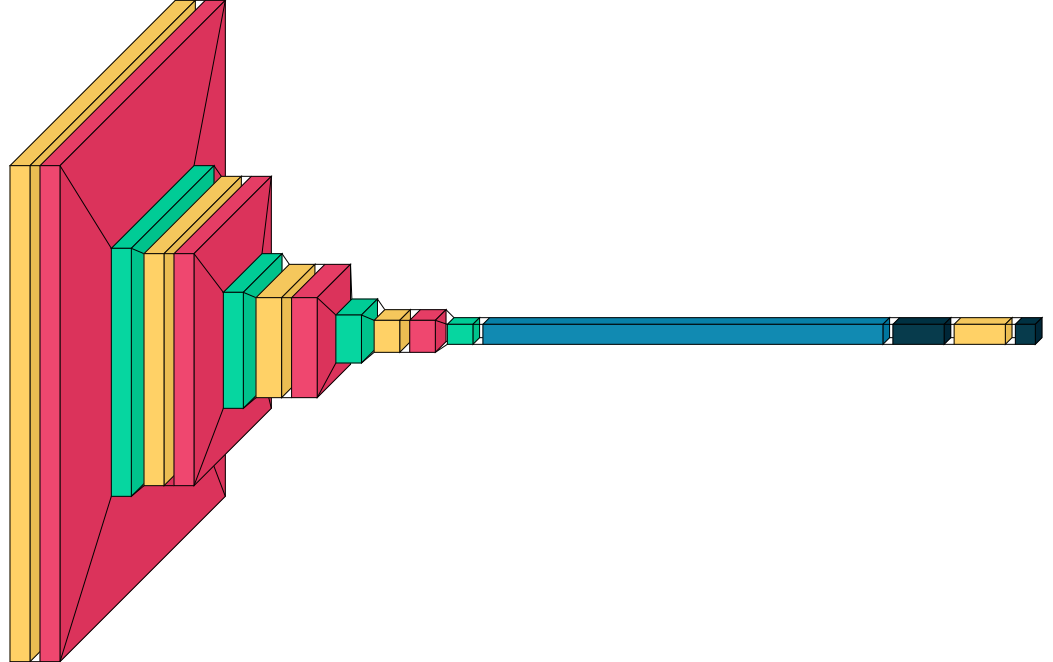

In [296]:
# display the model and saving to drive
visualkeras.layered_view(model6, legend=True) 
visualkeras.layered_view(model6, to_file='../Figures/Model_Architectures/Model6_Architecture.png') 

## Step 4: Results and Findings

In [72]:
# Defining a function to plot the loss and accuracy curves vs epochs for model fitting
def get_training_progress(history_name, model_name):
    """
    Training Progress Visualization
    """
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].plot(history_name.history['loss'], color='b', marker='o', label="Training loss")
    ax[0].plot(history_name.history['val_loss'], color='r', marker='o', label="validation loss",axes =ax[0])
    ax[0].set_title(f"Epochs vs. Training and Validation Loss for {model_name}")
    ax[0].set_xlabel('Epochs', )
    ax[0].set_ylabel('Loss')
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history_name.history['categorical_accuracy'], color='b', marker='o', label="Training accuracy")
    ax[1].plot(history_name.history['val_categorical_accuracy'], color='r',marker='o', label="Validation accuracy")
    ax[1].set_title(f"Epochs vs. Training and Validation Accuracy for {model_name}")
    ax[1].set_xlabel('Epochs', )
    ax[1].set_ylabel('Categorical Accuracy')
    legend = ax[1].legend(loc='best', shadow=True)
    plt.savefig(f"../Figures/Training_Progress/{model_name}")
    plt.show()

In [73]:
# Defining a function to plot the confusion matrix and classification report for each models outcome
def get_evaluation_metrics(true_category, pred_category, model_name, history_name):
    """
    Confusion matrix and model performance metric visualization
    """
    labels = ['Glioma','Meningioma','NoTumor','Pituitary']
    y_true = np.argmax(true_category, axis=-1)
    y_pred = np.argmax(pred_category, axis=-1)
    
    print(f"\nMax. training accuracy for {model_name}: {max(history_name.history['categorical_accuracy'])*100:.2f}%")
    print(f"Max. validation accuracy for {model_name}: {max(history_name.history['val_categorical_accuracy'])*100:.2f}%")
    
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    print(f"Test accuracy for {model_name}: {(accuracy*100):.2f}%")
    
    print(f"\nClassification Report for {model_name}:\n\n", classification_report(y_true, y_pred))
    
    fig, ax = plt.subplots(figsize=(16,8))
    sns.heatmap(confusion_matrix(y_true, y_pred),xticklabels=labels,yticklabels=labels,annot=True,
           cmap="Greens",alpha=0.7, ax=ax, linewidths=2,linecolor='gray',fmt='d')
    fig.text(s=f'      Confusion Matrix for {model_name}',size=18,fontweight='bold',
            fontname='monospace',color='g',y=0.92,x=0.28,alpha=0.7)
    plt.savefig(f"../Figures/Confusion_Matrix/{model_name}")
    plt.show()

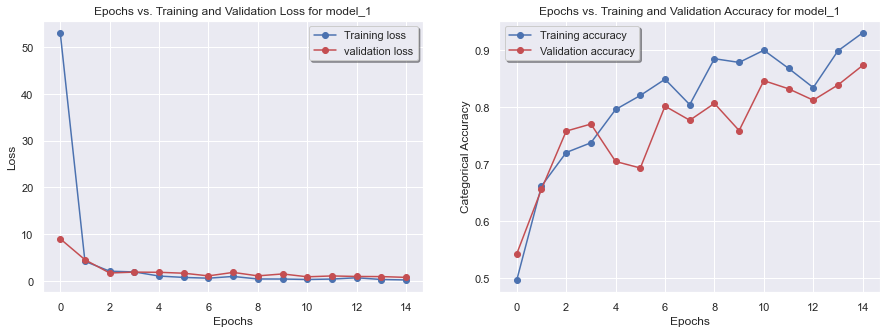

In [41]:
# Training progress for model 1
get_training_progress(history1, 'model_1')


Max. training accuracy for model_1: 92.97%
Max. validation accuracy for model_1: 87.26%
Test accuracy for model_1: 89.41%

Classification Report for model_1:

               precision    recall  f1-score   support

           0       0.83      0.81      0.82       241
           1       0.79      0.83      0.81       245
           2       0.96      0.98      0.97       323
           3       0.99      0.92      0.95       239

    accuracy                           0.89      1048
   macro avg       0.89      0.89      0.89      1048
weighted avg       0.90      0.89      0.89      1048



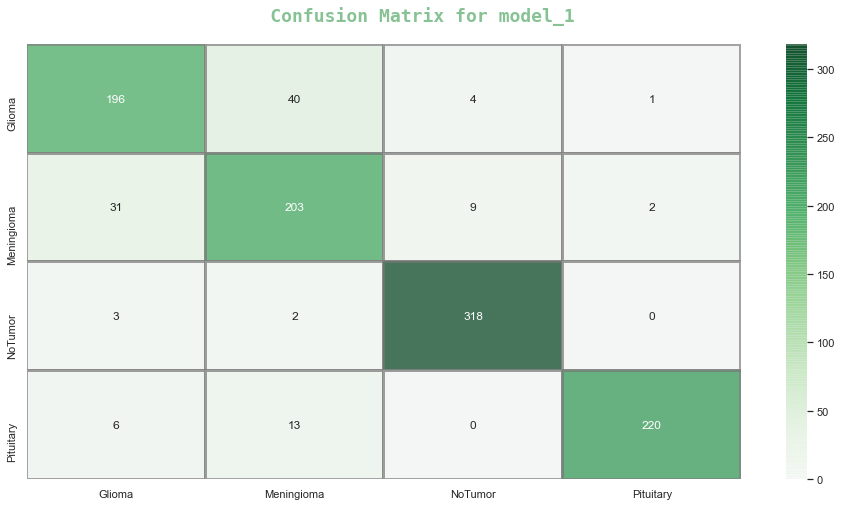

In [42]:
# Evaluation Metrics for model 1
get_evaluation_metrics(y_test, y_pred1, 'model_1', history1)

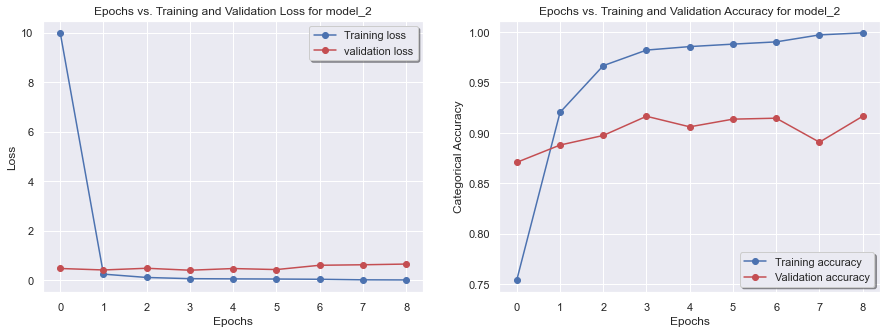

In [207]:
# Training progress for model 2
get_training_progress(history2, 'model_2')


Max. training accuracy for model_2: 99.90%
Max. validation accuracy for model_2: 91.63%
Test accuracy for model_2: 93.89%

Classification Report for model_2:

               precision    recall  f1-score   support

           0       0.94      0.86      0.90       241
           1       0.86      0.89      0.88       245
           2       0.98      0.99      0.99       323
           3       0.96      0.99      0.98       239

    accuracy                           0.94      1048
   macro avg       0.94      0.93      0.93      1048
weighted avg       0.94      0.94      0.94      1048



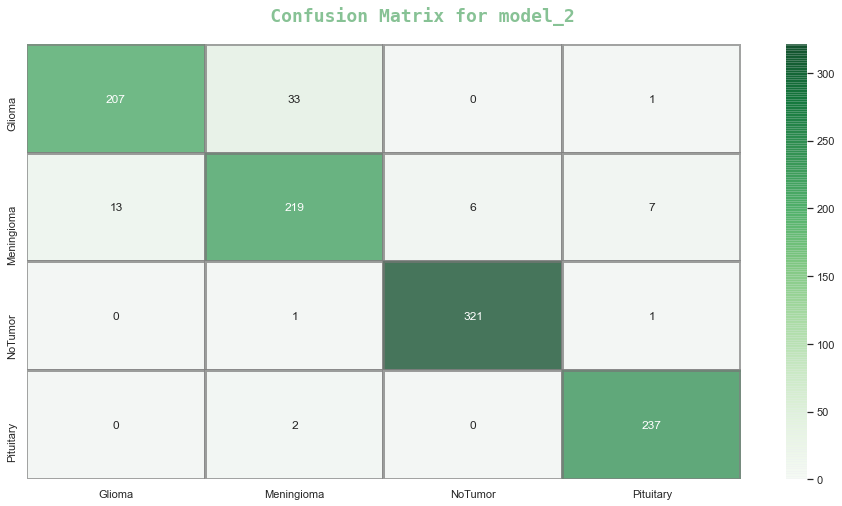

In [208]:
# Evaluation Metrics for model 2
get_evaluation_metrics(y_test, y_pred2, 'model_2', history2)

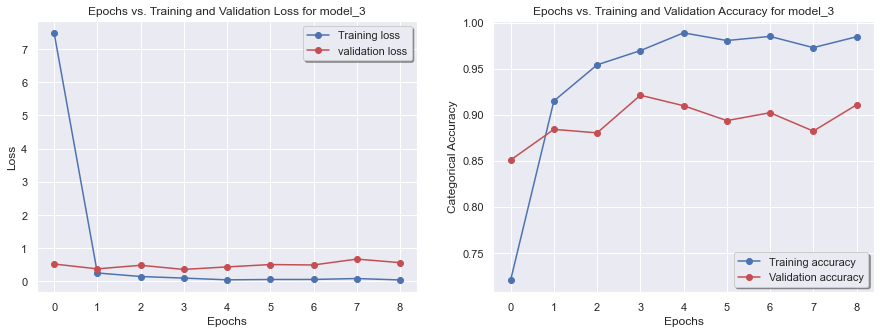

In [142]:
# Training progress for model 3
get_training_progress(history3, 'model_3')


Max. training accuracy for model_3: 98.88%
Max. validation accuracy for model_3: 92.11%
Test accuracy for model_3: 93.23%

Classification Report for model_3:

               precision    recall  f1-score   support

           0       0.93      0.88      0.91       241
           1       0.83      0.91      0.87       245
           2       0.98      1.00      0.99       323
           3       0.98      0.92      0.95       239

    accuracy                           0.93      1048
   macro avg       0.93      0.93      0.93      1048
weighted avg       0.93      0.93      0.93      1048



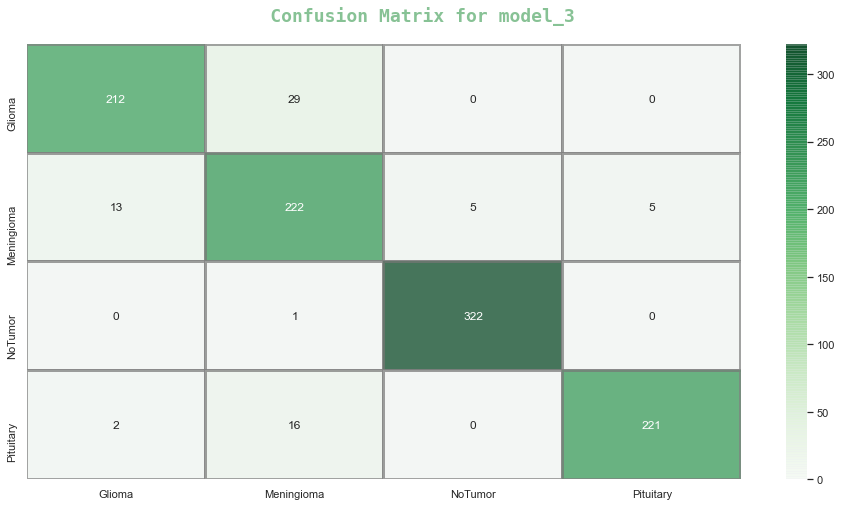

In [143]:
# Evaluation Metrics for model 3
get_evaluation_metrics(y_test, y_pred3, 'model_3', history3)

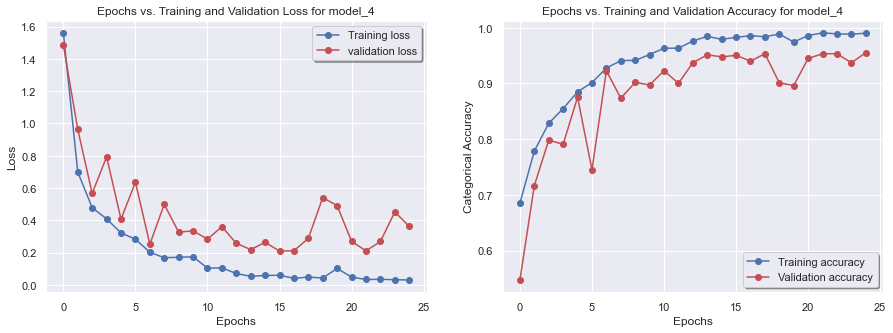

In [274]:
# Training progress for model 4
get_training_progress(history4, 'model_4')


Max. training accuracy for model_4: 99.09%
Max. validation accuracy for model_4: 95.53%
Test accuracy for model_4: 97.23%

Classification Report for model_4:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97       241
           1       0.97      0.92      0.95       245
           2       0.98      0.99      0.98       323
           3       0.97      0.99      0.98       239

    accuracy                           0.97      1048
   macro avg       0.97      0.97      0.97      1048
weighted avg       0.97      0.97      0.97      1048



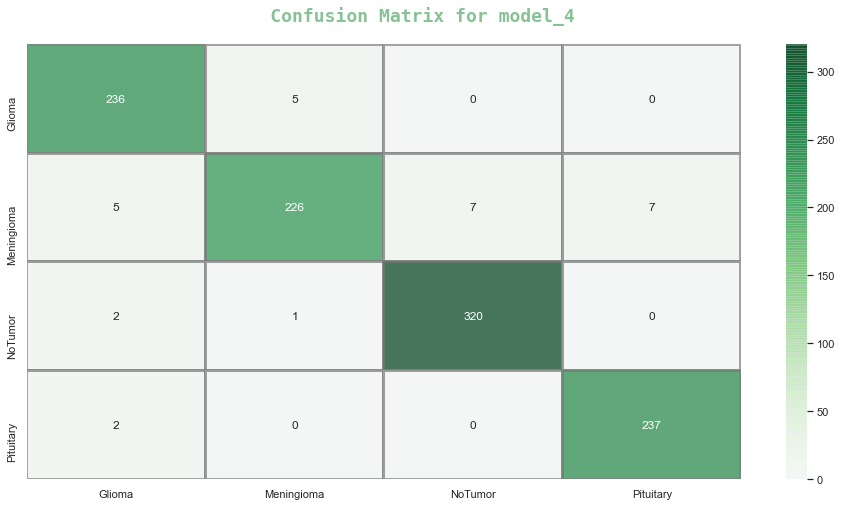

In [275]:
# Evaluation Metrics for model 4
get_evaluation_metrics(y_test, y_pred4, 'model_4', history4)

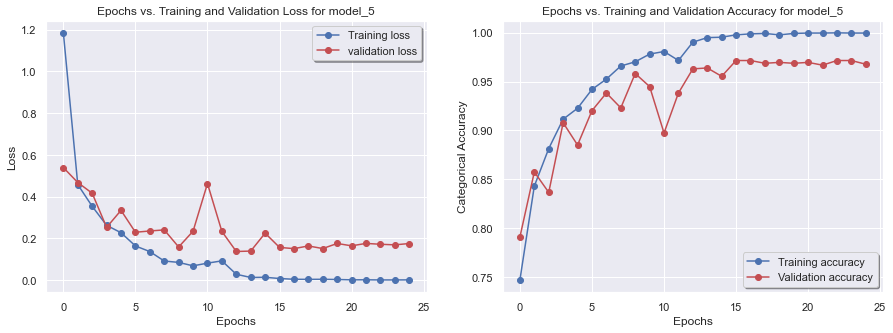

In [74]:
# Training progress for model 5
get_training_progress(history5, 'model_5')


Max. training accuracy for model_5: 99.98%
Max. validation accuracy for model_5: 97.15%
Test accuracy for model_5: 98.09%

Classification Report for model_5:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       241
           1       0.97      0.94      0.96       245
           2       0.98      1.00      0.99       323
           3       0.98      1.00      0.99       239

    accuracy                           0.98      1048
   macro avg       0.98      0.98      0.98      1048
weighted avg       0.98      0.98      0.98      1048



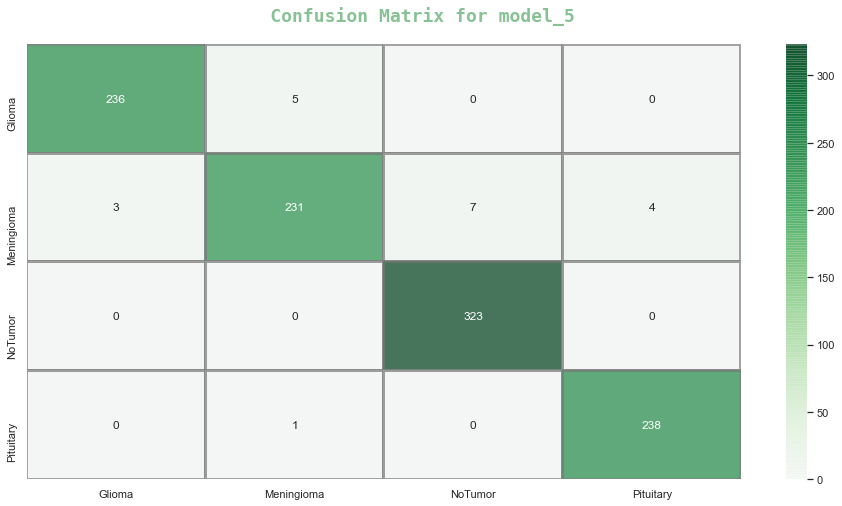

In [75]:
# Evaluation Metrics for model 5
get_evaluation_metrics(y_test, y_pred5, 'model_5', history5)

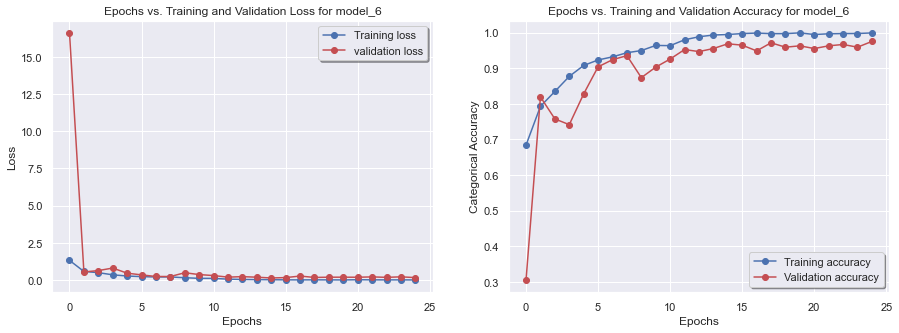

In [289]:
# Training progress for final model
get_training_progress(history6, 'model_6')


Max. training accuracy for model_6: 99.94%
Max. validation accuracy for model_6: 97.53%
Test accuracy for model_6: 97.81%

Classification Report for model_6:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98       241
           1       0.96      0.94      0.95       245
           2       0.98      1.00      0.99       323
           3       0.99      1.00      0.99       239

    accuracy                           0.98      1048
   macro avg       0.98      0.98      0.98      1048
weighted avg       0.98      0.98      0.98      1048



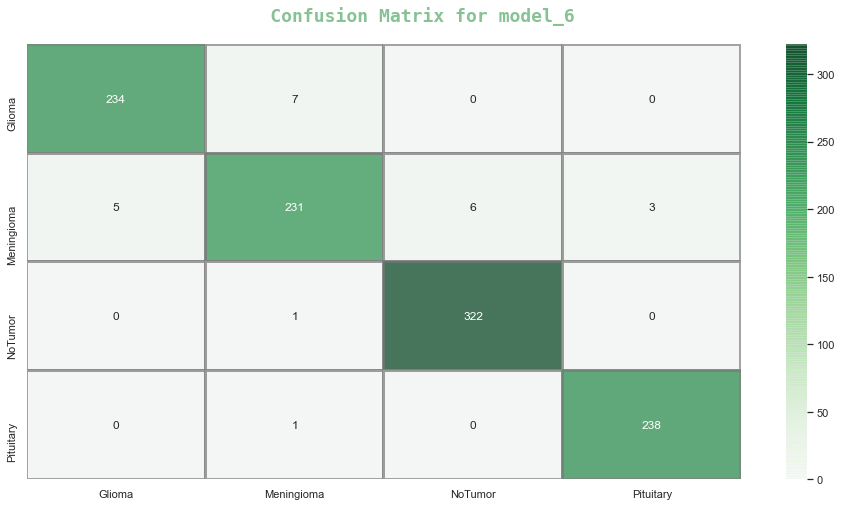

In [290]:
# Evaluation Metrics for final model
get_evaluation_metrics(y_test, y_pred6, 'model_6', history6)

## Step 5: Summary

To classify and detect brain tumor, I have implemented and trained several models and evaluated them by using test data to measure models performance. Initially, I have started to implement first model (model 1) without using any convolutional neural network and received 83.49% test accuracy and 83% recall value. After several training progress, and changing parameters, I have noticed that model_1's evaluation metric was unchanged. After that, I have implemented model_2 by using convolutional neural networks with two Conv2D layers and without using any regularization methods. Model_2 performed better than first model, but facing overfitting problem. Also, model_2 did not generalize well with test data and received both test accuracy and recall value of 93%. By adding BtachNormalization layers and dropout layer to model 2, I have implemented model_3 to mitigate overfitting problem. The performance metrics of model_3 was same with model_2 despite using additional layers to model_2. The unchanged evaluation metrics inspired me to add another Conv2D layer and dense layer to the previous model to implement model_4. Due to computational limitations, I have introduced learning rate scheduling with adam as a default optimizer to model_4 and received little bit progress than previous mode. I have received test accuracy and recall value of 97% form model_4, but validation accuracy was not stable and fluctuating with training accuracy. Finally, I have added another Conv2D layer to the previous model and changed some parameters to make model_5. It has four Conv2D layers with BatchNormalization and MaxPooling with each Conv2D layer. The model_5 results 97.9% test accuracy and 98% recall value which is best then all other models I have implemented. Model_6 is a copy of model_5 with small changes to the carnel size and number of filters, and additional hyperparameter tuning to improve the model_5's performance. The resulted evaluation metrics is not significantly better than previous best model (model_5). Finally, I have saved the best model (model5) for future use.

## Step 6: Save best model on disk

In [297]:
# serialize model to JSON
"""
from keras.models import model_from_json
model_json = model5.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

"""

In [298]:
# serialize weights to HDF5 Note: 
# I am having difficulty to upload the saved model to github because of file size issues
"""
model5.save_weights("model5.h5")
print("Saved model to disk")
"""

Saved model to disk
